# 9. Probability

### 독립과 종속

* 간략히 말해서, 사건 $E$와 $F$가 독립이라는 것은, 우리가 $E$의 사건이 발생했는지에 대한 정보를 알고 있을 때, 이것이 $F$에 대한 정보를 주지 못하면 사건 $E$와 $F$는 독립이라 한다.

* $P(E,F) = P(E)P(F)$

### 조건부 확률

* 만약 사건 $E$와 $F$가 독립이 아닐 수 있으면, 다음과 같이 조건부 확률을 정의

$$
P(E|F)P(E|F) = \frac{P(E,F)}{P(F)}
$$

* 사건 $F$가 발생하였을 때, $E$가 발생할 확률

### Example

* 두 자녀가 있는 가족을 생각해 보자.
* 각 자녀는 같은 확률로 남자 혹은 여자일 수 있다.
* 둘째의 성별은 첫째의 성별과 독립적이다.
* 첫째가 딸(G)일 때, 두 자녀가 모두 딸(B)일 확률?

$$
P(B|G) = \frac{P(B,G)}{P(G)} = \frac{P(B)}{P(G)} = \frac{1}{2}
$$

* 적어도 하나의 아이가 딸일 때(L), 두 아이가 모두 딸(B)일 확률?

$$P(B|L) = \frac{P(B,L)}{P(L)} = \frac{P(B)}{P(L)} = \frac{1}{3}$$
  
### 랜덤 가족을 만들어 결과 확인

In [2]:
import random

def random_kid(): return random.choice(["boy", "girl"])

both_girls, older_girl, either_girl = 0, 0, 0
random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    
    if older == "girl": older_girl += 1
    if older == "girl" and younger == "girl": both_girls += 1
    if older == "girl" or younger == "girl": either_girl += 1

print("P(both | older):", both_girls / older_girl)      
print("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


#### 응용 문제

* 둘 중의 하나 이상이 오전에 태어난 딸일 때, 다른 아이도 딸일 확률을 랜덤 가족을 만들어 확인해 보라.

### Bayes's theorem

* $P(F|E)$를 알 때 $P(E|F)$를 계산
$$ P(E|F) = \frac{P(E,F)}{P(F)} = \frac{P(F|E)P(E)}{P(F)} $$

* 사건 $F$는 $F,E$와 $F, E^c$로 나눌 수 있음
$$P(E|F) = \frac{P(F|E)P(E)}{P(F|E)P(E) + P(F|E^c)P(E^c)} $$
          

### 예제: Bayes's theorem

* 1,000명당 1명꼴로 발생하는 질병
* 99% 정확성을 지니는 질병 테스트
  * 질병이 걸린 사람이 양성 반응이 나올 확률 : 0.99  
  * 질병에 걸리지 않은 사람이 음성 반응이 나올 확률 : 0.99
  
* 질병에 대한 랜덤 테스트를 진행했을 때, 양성 반응의 의미
  * $𝐷$ : 질병 감염, $𝑇$ : 양성 반응.
$$P(D|T) =  \frac{P(T|D)P(D)}{P(T|D)P(D) + P(T|D^c)P(D^c)}  $$
  * $P(T|D)=0.99,  P(T|D^c)=0.01$
  * $P(D)=0.001,  P(D^c)=0.999$
* ⇒ $P(D|T)= 9.01\%$
* 9.01%의 양성 반응자만이 실제로 질병에 걸림을 알 수 있음
  * 실제 테스트에서는 증상이 있는 환자가 검사를 받기 때문에, 
  * 양성반응+증상이 있음을 조건으로 병에 걸렸을 확률을 계산하면, 확률은 보다 상승할 수 있음

In [1]:
def random_disease():
    if random.choice(range(1000)) == 0 : return "disease"  # 병에 걸림
    else: return "healthy"                                 # 병에 걸리지 않음

def random_test():
    if random.choice(range(100)) == 0 : return "wrong"  # 검사 부정확
    else: return "right"                                 # 검사 정확


# 위 예제를 응용하여 나머지 부분을 완성해 보자.

### 확률 변수

* 확률 변수는 특정 확률 분포를 따르며 랜덤 값을 가지는 변수를 말함
  * 동전의 앞이 나오면 1, 뒷면이 나오면 0
  * 동전을 9번 던졌을 때 앞면의 수 
  * ```range(10)```에서 고를 수 있는 임의의 숫자
* 기댓값 : 발생 가능한 확률 변수 값에 확률을 곱한 뒤 합하여 얻는 값
 * 동전 던져서 나온 앞면의 수 : 0.5
 * 주사위의 값 : 3.5

### 연속 분포 – 균등 분포

* 예: 0과 1사이의 균등 분포 (uniform distribution)

* 확률 밀도 함수(pdf)를 통해 확률 변수의 분포 정도를 표현

* 0과 1사이의 균등 분포에 대한 pdf

In [3]:
def uniform_pdf(x):
    return 1 if x>=0 and x<1 else 0

* random.random()을 이용하여 균등 분포를 지니는 확률 변수 생성

* 0과 1사이 균등 분포의 확률 누적 함수(cdf):

In [4]:
def uniform_cdf(x):
    if x<0: return 0
    elif x<1: return x
    else: return 1

### 연속 분포 – 정규 분포

* 벨 모양의 정규분포는 평균 𝜇와 표준 편차 𝜎를 이용하여 표현
* 정규 분포의 pdf:
$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left( -\frac{ (x-\mu)^2 }{2\sigma^2} \right) $$

In [6]:
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x - mu) ** 2 / 2 /sigma ** 2)/(sqrt_two_pi * sigma))

### 정규분포 pdf 그리기

In [7]:
%matplotlib inline 

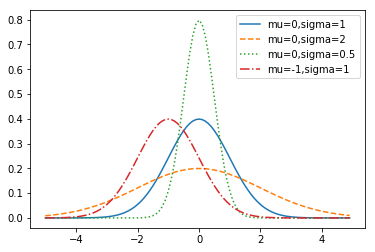

In [8]:
from matplotlib import pyplot as plt
import math
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.show()

### 정규분포의 cdf

* 정규 분포의 cdf:
$$ F(x) = \frac{1}{2} \left\{ 1 + erf\left( \frac{x - \mu}{\sqrt{2} \sigma} \right) \right\}$$
* erf는 에러 함수라고 불리며 ```math.erf```를 통해 계산

In [9]:
def normal_cdf(x, mu=0, sigma=1):
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

### 정규분포 cdf 그리기

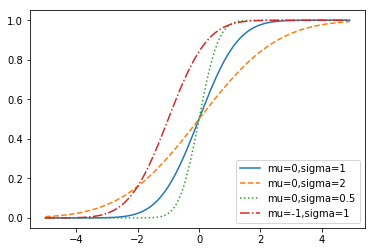

In [10]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.show()

### 정규분포 cdf의 역함수

* 주어진 $𝑝$에 대해, $𝑝=𝐹(𝑧)$를 만족하는 $𝑧$를 찾는다.
* 이진 탐색을 이용한 방법
  * 먼저 탐색 도메인을 ```(left, right)```으로 설정
  * 이 도메인의 중앙값인 ```mid```에서 ```𝐹(mid)```를 계산
   * 만약 ```𝐹(mid) < 𝑝``` 이면 새로운 탐색 도메인 ```(left, right) = (mid, right)```으로 재설정  
   * 만약 ```𝐹(mid) > 𝑝``` 이면 새로운 탐색 도메인 ```(left, right) = (left, mid)```으로 재설정
   * 만약 ```𝐹(mid) ≈ 𝑝``` 이면 탐색 종료

### 정규분포 cdf의 역함수

In [28]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.000001):
    # 표준 정규 분포가 아닌 경우 X = mu + sigma * Z를 이용
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    left, right = -10.0, 10.0
    while normal_cdf(right) - normal_cdf(left) > tolerance:
        mid = (right + left) / 2          # 중앙값
        if normal_cdf(mid) < p:           # 중앙값이 아직 작으면 윗쪽을 탐색
            left = mid
        elif normal_cdf(mid) > p:         # 중앙값이 아직 크면, 아랫쪽을 탐색
            right = mid
        else:
            break
    return (right + left) / 2

In [29]:
inverse_normal_cdf(0.975)

1.9599676132202148

#### 예제 : 이진탐색을 이용해 제곱근을 찾는 함수를 작성해 보자.

### 중심 극한 정리

* 같은 분포를 지니는 독립 확률 변수들의 합 혹은 평균은 정규 분포와 가까워 진다.
* $X_1, \cdots, X_n$ 을 평균 $\mu$, 표준 편차 $\sigma$를 가질 때, $n$이 충분히 크면
$$\frac{ X_1 + \cdots + X_n - n\mu}{\sigma \sqrt{n}}$$

이 평균 0, 표준편차 1인 정규 분포에 근사함.

#### 베르누이 분포와 이항 분포

* 베르누이 분포 : p의 확률로 성공 시 1, 실패 시 0
* 이항 분포 : n회 독립 베르누이 시행 시 총 성공 횟수

In [11]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [12]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

이항 분포의 평균 : $np$,  표준편차 : $ \sqrt{np(1-p)}$

#### 이항분포와 중심 극한 정리

In [13]:
from collections import Counter
import random
def make_hist(n, p, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # 이항 분포 샘플을 히스토그램으로
    histogram = Counter(data)                  #from collections import Counter
    plt.bar([x for x in histogram.keys()],
            [v / num_points for v in histogram.values()], 0.8, facecolor='none',  edgecolor='black')
    
    mu, sigma = p * n, math.sqrt(n * p * (1 - p))
    # 정규 분포 그리기
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    #ys = [normal_pdf(i) for i in xs]
    plt.plot(xs,ys)
    plt.show()

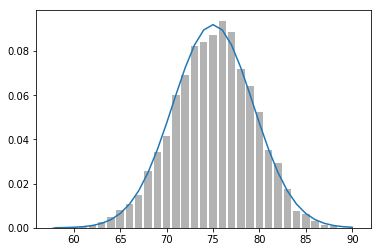

In [14]:
make_hist(100, 0.75, 10000)

### numpy의 기능을 이용한 확률, 통계 함수

In [1]:
import numpy as np
x = np.random.rand(10)                         # 10개의 uniform 확률 변수 array
y = np.random.randint(0, 10, 20)               # 0이상 10미만의 20개의 random 정수 
z = np.random.randn(10)                        # 10개의 표준정규 확률 변수 array
b = np.random.binomial(n=10, p=0.4, size=10)   # n, p의 모수를 지니는 이항분포를 따르는 10개의 확률 변수
t = np.random.standard_t(df=5, size=10)        # 자유도 nu의 t분포를 따르는 10개의 확률 변수
c = np.random.choice([-1, 1])                  # -1과 1중의 하나를 랜덤으로 선택

[numpy.random.rand](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html) 
[numpy.random.randint](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.random.randint.html)   
[numpy.random.randn](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html)   
[numpy.random.binomial](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html)   
[numpy.random.standard_t](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.standard_t.html)

### 정규 모집단 소표본

정규 모집단 소표본으로부터 T 통계량을 계산하면 student t 분포를 따른다.

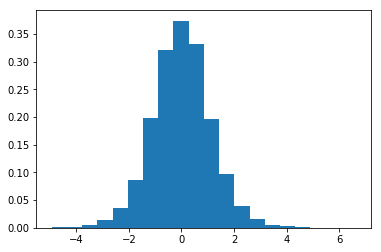

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
mean_x = np.zeros(N)
std_x = np.zeros(N)
ts = np.zeros(N)

mu, sigma, n = 5, 3, 10      #모평균, 모표준편차, 표본 개수

for i in range(N):
    x = np.random.normal(mu, sigma, n)
    mean_x[i], std_x[i] = x.mean(), x.std(ddof=1)          # 표본 평균, 표본 표준편차
    ts[i] = (mean_x[i] - mu)/(std_x[i]/np.sqrt(n))   # t 통계량
    
plt.hist(ts, bins=20, normed=True)
plt.show()

위 예제에서 ```for``` 문을 list comprehension으로 바꾸어 작성하여 보자.
  * 주어진 샘플로부터 t통계량을 생성하는 ```t()``` 함수를 먼저 작성 후, 이를 list comprehension에서 활용하자.

### random walks

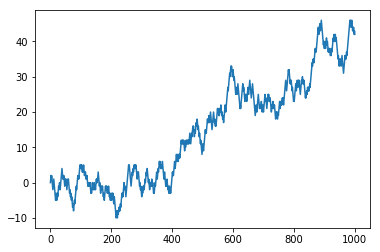

In [21]:
import numpy as np
import matplotlib.pyplot as plt

position = 0
walk = [position]
steps = 1000
for _ in range(steps):
    if np.random.randint(0,2): step=1  # 0은 False, 1은 True를 의미
    else: step=-1
    position += step
    walk.append(position)
    
plt.plot(range(steps+1), walk) 
plt.show()

위 예제에서 ```for``` 문을 list comprehension으로 바꾸어 작성하여 보자.  
 * ```np.random.choice()```를 활용하여 보자.  
 * ```np.cumsum()```를 이용하자.

In [4]:
# np.cumsum 예제
x = [0, 1, 2, 3, 4, 5]
print(np.cumsum(x))

[ 0  1  3  6 10 15]


### 브라운 운동 - Brownian motion

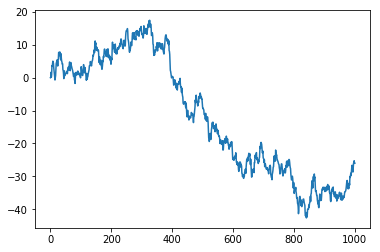

In [22]:
import numpy as np
import matplotlib.pyplot as plt

position = 0
walk = [position]
steps = 1000
for _ in range(steps):
    step = np.random.normal(loc=0, scale=1)
    position += step
    walk.append(position)
    
plt.plot(range(steps+1), walk) 
plt.show()

위 예제에서 ```for``` 문을 list comprehension으로 바꾸어 작성하여 보자.    
 * ```np.cumsum()```를 이용하자.